# Exercício 1

## 1

In [270]:
import numpy as np

def pivot(matriz,s,i):
    a = 0
    b = 0
    c = np.zeros(len(matriz[0]))
    for j in range(i,len(matriz)):
        if np.abs(matriz[j][i]) > np.abs(a):
            a,b = matriz[j][i],j
    c = np.copy(matriz[i])
    matriz[i] = np.copy(matriz[b])
    matriz[b] = np.copy(c)
    f = np.copy(s[i])
    s[i] = np.copy(s[b])
    s[b] = f
    return matriz


def gauss_piv(matriz,s):                      
    matriz1= np.copy(matriz)
    s1 = np.copy(s)
    for i in range(len(matriz1)):
        pivot(matriz1,s1,i)
        a = matriz1[i][i]
        matriz1[i]=matriz1[i]/a
        s1[i] = s1[i]/a
        for j in range(i + 1,len(matriz1)):
            a = matriz1[j][i]
            matriz1[j] = matriz1[j] - matriz1[i]*a
            s1[j] = s1[j] - s1[i]*a
    s1[-1] /= matriz1[-1][-1]
    matriz1[-1][-1] /= matriz1[-1][-1]
    sol = np.zeros(len(matriz1))
    for i in range(1,len(matriz1)+1):
            sol[-i] = s1[-i] - np.dot(sol,matriz1[-i])
    return sol


## definição de funções

In [271]:
import numpy as np
def thomas(trid,s):                     # função que faz eliminação de gauss em matrizes tridiagonais.
    matriz = np.copy(trid)
    v = np.copy(s)
    for i in range(len(matriz)-1):
        a = matriz[i][i]
        v[i] /= a
        matriz[i] /= a
        b =matriz[i+1][i]
        v[i+1] -= v[i]*b
        matriz[i+1] -= matriz[i]*b
    a = matriz[-1][-1]
    v[-1] /= a
    matriz[-1] /= a
    sol = np.zeros(len(trid))
    for i in range(1,len(trid)+1):
        if i == 0:
            sol[-i] = v[-i]
        else:
            sol[-i] = v[-i] - sol[-i+1]*matriz[-i][-i+1]
    return sol

def gauss(matriz,s):                       #funções que faz eliminação de gauss em qualquer matriz
    matriz1= np.copy(matriz)
    s1 = np.copy(s)
    for i in range(len(matriz1)):
        a = matriz1[i][i]
        matriz1[i]=matriz1[i]/a
        s1[i] = s1[i]/a
        for j in range(i + 1,len(matriz1)):
            a = matriz1[j][i]
            matriz1[j] = matriz1[j] - matriz1[i]*a
            s1[j] = s1[j] - s1[i]*a
    sol = np.zeros(len(matriz1))
    for i in range(1,len(matriz1)+1):
            sol[-i] = s1[-i] - np.dot(sol,matriz1[-i])
    return sol

def A(N,k):                                 # função que gera uma matriz diagonal a partir de valores N e k, de acordo 
    trid = np.zeros((N,N))                  # com as equações de movimento das molas num sistema livre.
    for i in range(1,N-1):
        trid[i][i] = -(k[i] + k[i+1])
        trid[i][i-1] = k[i]
        trid[i][i+1] = k[i+1]
    trid[0][0] = -k[0] - k[1]
    trid[N-1][N-1] = -k[N-1]-k[N]
    trid[0][1] = k[1]
    trid[N-1][N-2] = k[N-1] 
    return trid

def Aw(N,k,w):                              # função que gera uma matriz diagonal a partir de valores N e k, de acordo     
    trid = np.zeros((N,N))                  #     com as equações de movimento das molas num sistema forçado com
    for i in range(1,N-1):                  #     frequência w.
        trid[i][i] = (k[i] + k[i+1] - m*w[z]**2)
        trid[i][i-1] = -k[i]
        trid[i][i+1] = -k[i+1]
    trid[0][0] = k[0] + k[1] - m*w[z]**2
    trid[N-1][N-1] = k[N-1]+k[N] - m*w[z]**2
    trid[0][1] = -k[1]
    trid[N-1][N-2] = -k[N-1] 
    trid = trid/m
    return trid

def QR(A):                                 #função que decompõe matriz A em duas matrizes QR.
    N = len(A[0])
    U = np.zeros([N,N],float)
    Q = np.zeros([N,N],float)
    R = np.zeros([N,N],float)
    U[0] = A[0]
    Q[0] = U[0] / np.linalg.norm([U[0]])
    for i in range(1,N):
        s = np.zeros(N)
        for j in range(i+1):
            s = s + ( np.dot(Q[j],A[i]) * Q[j] )
        U[i] = A[i] - s
        Q[i] = U[i] / np.linalg.norm(U[i])
    for k in range(N):
        R[k,k] = np.linalg.norm(U[k])
        for l in range(k+1,N):
            R[k,l] = np.dot(Q[k],A[l])
    Q = np.matrix.transpose(Q)
    results = [Q,R]
    return results

def eigen(A,epsilon):                     # função que obtem um array onde o primeiro elemento é a matriz dos vetores 
    N = len(A[0])                         # própios da matriz A e o segundo é um array dos seus valores próprios,
    V = np.identity(N)                    # com um certo erro epsilon.
    values = np.zeros(N)
    trigger = True
    while trigger:
        trigger = False
        Q = QR(A)[0]
        R = QR(A)[1]
        A = np.dot(R,Q)
        V = np.dot(V,Q)
        for i in range(N):
            for j in range(N):
                if A[i,j] > epsilon and i!=j :
                    trigger = True
    for i in range(N):
        values[i] = A[i,i]
    return [V,values]


## 2

O sistema está em equilíbrio quando as massas não estiverem aceleradas. Assim, as equações $m _ { i } \frac { d ^ { 2 } X _ { i } } { d t ^ { 2 } } = - k _ { i } \left( X _ { i } - X _ { i - 1 } \right) + k _ { i + 1 } \left( X _ { i + 1 } - X _ { i } \right)$ ficam do tipo:

$0 = - k _ { i } \left( X _ { i } - X _ { i - 1 } \right) + k _ { i + 1 } \left( X _ { i + 1 } - X _ { i } \right)$

organizando melhor estas equações, obtemos um sistema de equações do tipo:

$0 = - (k _ { i } +k _ { i + 1 }) X _ { i } + k _ { i }X _ { i - 1 }  + k _ { i + 1 } X _ { i + 1 }$
Em que para a primeira equação não temos o termo $X _ { i - 1 }$ e na última o termo $X _ { i + 1 } = L$. Temos então um sistema $AX = B$ onde A é a matriz dos coeficientes, X é a matriz coluna das soluções e B é a matriz coluna cujas entradas são 0 à exceção da última, que é $-kL$, o que fica $-k$ quando normalizarmos o L.

In [272]:
N = 10
m = 1
k = 2

trid = np.zeros((N,N))
for i in range(1,N-1):
    trid[i][i] = -2*k
    trid[i][i-1] = k
    trid[i][i+1] = k
trid[0][0] = -2*k
trid[N-1][N-1] = -2*k
trid[0][1] = k 
trid[N-1][N-2] = k 
s = np.zeros(N)
s[-1] = -k

In [273]:
print('As posições de equilíbrio são', thomas(trid,s))

As posições de equilíbrio são [ 0.09090909  0.18181818  0.27272727  0.36363636  0.45454545  0.54545455
  0.63636364  0.72727273  0.81818182  0.90909091]


Aqui vemos que as posições de equilíbrio, que são as soluções do nosso sistema, estão igualmente espaçadas para um k igual, e estão espaçadas de  1$/ ( N + 1 )$, tal como esperado.

## 3

In [274]:
m = np.random.normal(1,0.1,N)
trid = np.zeros((N,N))
for i in range(1,N-1):
    trid[i][i] = -2*k
    trid[i][i-1] = k
    trid[i][i+1] = k
trid[0][0] = -2*k
trid[N-1][N-1] = -2*k
trid[0][1] = k 
trid[N-1][N-2] = k 
s = np.zeros(N)
s[-1] = -k
print('As posições de equilíbrio são', thomas(trid,s))

As posições de equilíbrio são [ 0.09090909  0.18181818  0.27272727  0.36363636  0.45454545  0.54545455
  0.63636364  0.72727273  0.81818182  0.90909091]


podemos ver que as posições de equilíbrio não se alteram com as massas, como era de esperar.

## 4

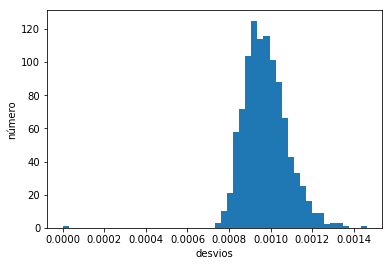

In [275]:
N = 2**10
k = np.random.normal(1,0.1,N+1)
trid = A(N,k)
s = np.zeros(N)
s[-1] = -k[N]
T = thomas(trid,s)
D = np.zeros(len(T))
for i in range(1,len(T)):
    D[i] = T[i]-T[i-1]
import pylab as p
p.hist(D,bins=50)
p.xlabel('desvios')
p.ylabel('número')
p.show()

Com a variação do k das molas, as posições de equilíbrio variam, pois as forças exercidas pelas molas são $F = kx$.

## 5

In [276]:
N = 10
m = 1
k = np.random.normal(10,1,N+1)
trid = A(N,k)

valores=eigen(trid,10**(-6))[1]
U = eigen(trid,10**(-6))[0]
print('a matriz dos vetores próprios é:\n ', U)
print('os valores próprios próprios são:\n ', valores)

a matriz dos vetores próprios é:
  [[ 0.04415684  0.37528909  0.29221513  0.34909823  0.45058186  0.42475373
   0.3487069   0.29046903  0.22206775  0.10595477]
 [-0.08044574 -0.54538043 -0.34749269 -0.23674178 -0.06138063  0.17066039
   0.33373237  0.41501979  0.39618764  0.21404418]
 [ 0.11251147  0.48284606  0.16123746 -0.16405481 -0.44009087 -0.37912545
  -0.06700588  0.25926356  0.44558604  0.30597216]
 [-0.18314394 -0.3419593   0.12930182  0.45912656  0.27972106 -0.26107231
  -0.44475606 -0.12827942  0.33695723  0.38444714]
 [ 0.32737426  0.22173889 -0.36423543 -0.35684351  0.26223061  0.33176309
  -0.23905556 -0.39235633  0.12038025  0.42336642]
 [-0.49111533 -0.05033635  0.38374446 -0.11257324 -0.342071    0.31160889
   0.22414881 -0.3709036  -0.11689529  0.42514713]
 [ 0.54370708 -0.13646286 -0.09775494  0.40599841 -0.19056939 -0.20046506
   0.41578482 -0.11882676 -0.30296639  0.39507136]
 [-0.4389801   0.24084326 -0.28518398 -0.14354742  0.37533741 -0.40123386
   0.15651318  0

Para descobrir as constantes face às condições iniciais que não são dadas, começamos por derivar a equação e igualá-la a zero, visto que as velocidades iniciais são nulas. assim, obtemos:

$0 =\sqrt { \lambda _ { \beta } } U _ { i \beta } A _ { \beta }  - \sqrt { \lambda _ { \beta } } U _ { i \beta } B _ { \beta } $

O que nos dá:

$ B _ { \beta } = A _ { \beta }   $

Usando agora as posições iniciais, obtemos o sistema de equações da forma 

$x _ { 0_{i} } = 2U _ { i \beta } A _ { \beta } $

o que se trata, na forma matricial, de resolver o sistema 

$2UA = X_{0}$

onde $U$ é a matriz dos vetores próprios obtidos na alínea anterior, $A$ é a matriz coluna das constantes a obter e $X_{0}$ é a matriz coluna das posições iniciais impostas.

Resolvemos este sistema na célula seguinte.

In [277]:
x0 = np.random.uniform(-1/(2*(N+1)),1/(2*N),N)
U1 = 2*eigen(trid,10**(-6))[0]
Ab=gauss(U1,x0)
print('As constantes são:\n',Ab)

As constantes são:
 [-0.00491527  0.01702555  0.03877537 -0.01459168  0.01346539 -0.00164806
 -0.00795271 -0.00474839  0.01221198  0.01773803]


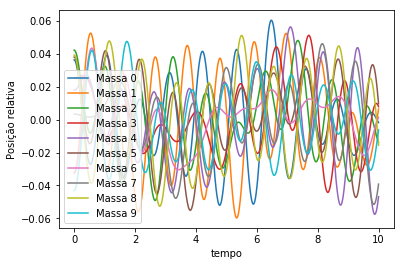

In [278]:
t = np.linspace(0,10,1000)
for i in range(N):
    y = np.zeros(len(t))
    for j in range(len(t)):
        for v in range(N):
            y[j] += 2*U[i][v]*Ab[v]*(np.cos(t[j]*np.sqrt(-valores[v])))
    massa = str(i)
    p.plot(t,y,label='Massa ' + massa)
p.legend()
p.xlabel('tempo')
p.ylabel('Posição relativa')
p.show()
            
        

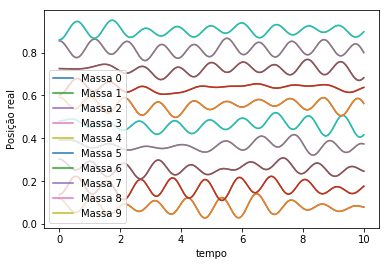

In [279]:
trid = A(N,k)
s = np.zeros(N)
s[-1] = -k[N]
T = thomas(trid,s)

for i in range(N):
    y = np.zeros(len(t))
    for j in range(len(t)):
        for v in range(N):
            y[j] += 2*U[i][v]*Ab[v]*(np.cos(t[j]*np.sqrt(-valores[v])))
    y += T[i]
    massa = str(i)
    p.plot(t,y,label='Massa ' + massa)
    p.plot(t,y)
p.xlabel('tempo')
p.ylabel('Posição real')
p.legend()
p.show()

Vemos, no gráfico acima, que as posições das molas não se cruzam, tendo por isso um sistema bem comportado.

# Exercício 2

## 1 e 2


Resolvendo o sistema em ordem aos $x_{i}$, obtemos um sistema de equações do tipo:

$(k _ { i + 1 } +k _ { i }- m \omega ^ { 2 }) x _ { i } + k_{i}x _ { i-1 } + k_{i+1}x _ { i+1 } =   \tilde { F } \delta _ { i l }$

o que é equivalente a resolver uma $AX = B$ onde A é a matriz dos coeficientes, X é a matriz coluna das soluções a obter e B é a matriz coluna com $\tilde { F }$ na primeira entrada e 0 nas outras.

A raíz quadrada dos valores próprios da matriz do sistema dá-nos as frequências de ressonância, representadas no gráfico.

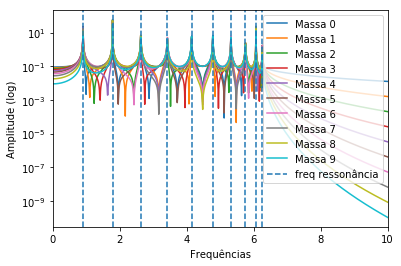

In [286]:
k = np.random.normal(10,0.01, N+1)
N = 10
F = 1
trid = A(N,k)
valores = eigen(trid,10**(-6))[1]
U = np.copy(eigen(trid,10**(-6))[0])
w = np.linspace(0,10,1000)
y = np.zeros((len(w),N))

for z in range(len(w)):
    trid = Aw(N,k,w)
    s = np.zeros(N)
    s[0] = F
    y[z] = np.copy(thomas(trid,s))
for i in range(N):
    massa = str(i)
    p.plot(w,np.abs(y[:,i]),label = 'Massa '+ massa)
    
for i in valores:
    if i == valores[0]:
        p.axvline(np.sqrt(-i), ls= '--', label='freq ressonância')
    else:
        p.axvline(np.sqrt(-i), ls= '--')
p.yscale('log')
p.xlim(0,10)
p.xlabel('Frequências')
p.ylabel('Amplitude (log)')
p.legend(loc=1)
p.show()

## 3 

In [287]:

w = np.sqrt(-valores)
y = np.zeros((len(w),N))
for z in range(len(w)):
    trid = Aw(N,k,w)
    s = np.zeros(N)
    s[0] = F
    y[z] = np.copy(thomas(trid,s))
for i in range(len(w)):
    y[i] /= np.linalg.norm(y[i]) 

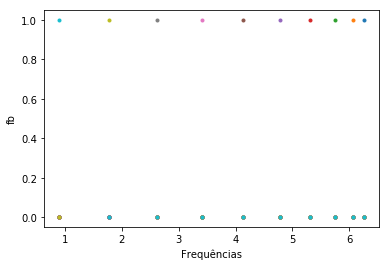

In [288]:
fb = np.zeros((len(w),N))
for i in range(len(w)):
    fb[i] = np.copy(np.dot(np.transpose(U),y[i]))
for i in range(N):
    p.plot(w,np.abs(fb[i]),'.')
p.xlabel('Frequências')
p.ylabel('fb')    
p.show()

Podemos ver que na base dos vetores próprios  só há uma componente relevante para cada frequência de ressonância. 

## 4

Fazemos o mesmo que fizemos para a alínea anterior, mas desta vez com uma força -1 na massa 9.

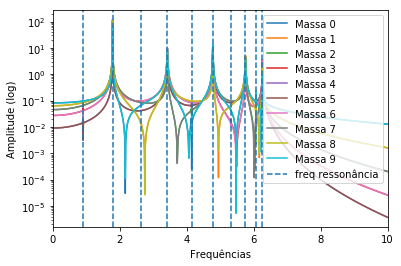

In [289]:
#k = [1,2,3,4,5,6,7,8,9,10,11]
N = 10
F = 1
trid = A(N,k)
valores = eigen(trid,10**(-6))[1]
U = np.copy(eigen(trid,10**(-6))[0])
w = np.linspace(0,10,1000)
y = np.zeros((len(w),N))
for z in range(len(w)):
    trid = Aw(N,k,w)
    s = np.zeros(N)
    s[0] = F
    s[-1] = -1
    y[z] = np.copy(thomas(trid,s))
for i in range(N):
    massa = str(i)
    p.plot(w,np.abs(y[:,i]), label = 'Massa ' + massa)
    
for i in valores:
    if i == valores[0]:
        p.axvline(np.sqrt(-i), ls= '--', label='freq ressonância')
    else:
        p.axvline(np.sqrt(-i), ls= '--')
p.yscale('log')
p.xlim(0,10)
p.xlabel('Frequências')
p.ylabel('Amplitude (log)')
p.legend(loc = 1)
p.show()

No gráfico acima, vemos que com uma força contrária a ser aplicada no outro extremo do sistema, o número de frequências de ressonância diminui para metade.

In [290]:
w = np.sqrt(-valores)
y = np.zeros((len(w),N))
for z in range(len(w)):
    trid = Aw(N,k,w)
    s = np.zeros(N)
    s[0] = F
    s[-1] = -1
    y[z] = np.copy(thomas(trid,s))
for i in range(len(w)):
    y[i] /= np.linalg.norm(y[i]) 

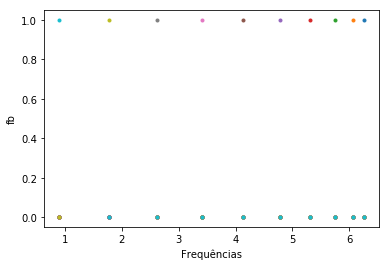

In [291]:
fb = np.zeros((len(w),N))
for i in range(len(w)):
    fb[i] = np.copy(np.dot(np.transpose(U),y[i]))
for i in range(N):
    p.plot(w,np.abs(fb[:,i]),'.')
p.xlabel('Frequências')
p.ylabel('fb')    
p.show()

Vemos que o mesmo acontece quanto às componentes relevantes para cada frequência.